In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
from sklearn.model_selection import  train_test_split
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 500 , noise=0.3 , random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    #custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel('x1')
    plt.ylabel('x2')

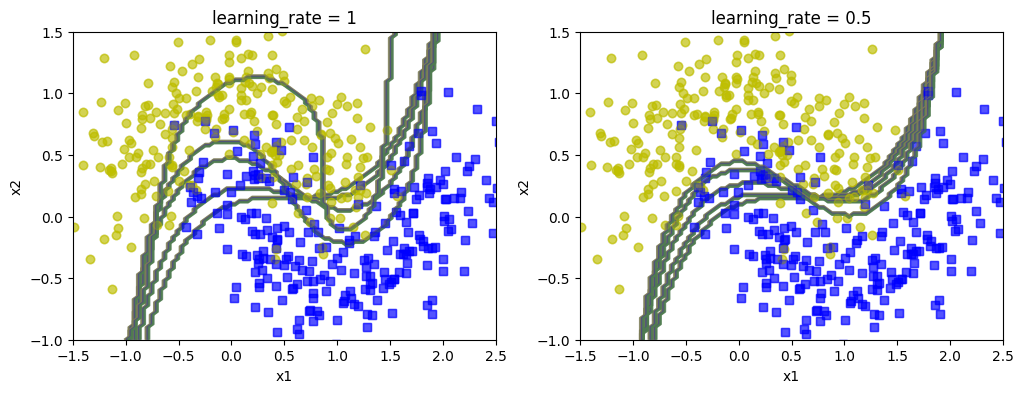

In [141]:
from sklearn.svm import SVC
m = len(X_train)
plt.figure(figsize= (12,4))
for subplot,learning_rate in((121,1),(122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf=  SVC(kernel='rbf',C= 0.05, random_state=42)
        svm_clf.fit(X_train,y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        # 修改错误分类样本的权重
        sample_weights[y_pred != y_train ] *=(1 + learning_rate )
        plot_decision_boundary(svm_clf,X,y,alpha=0.2)
        plt.title (f"learning_rate = {learning_rate}")

plt.show()

1. Adaboost

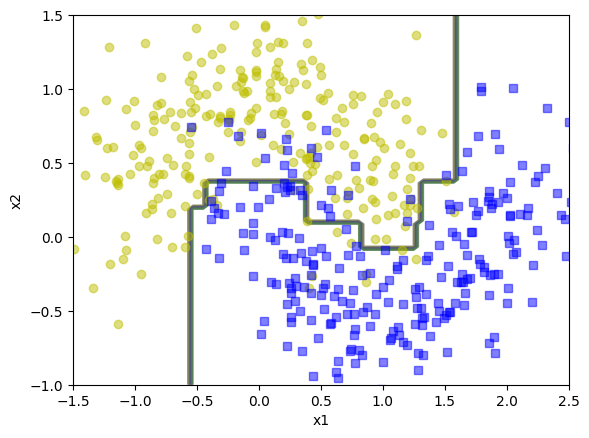

In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                            n_estimators=200,
                            learning_rate= 0.5,
                            random_state=42
                            )

ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf,X,y)

2. Gradient Boosting 梯度提升算法

In [150]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X**2 + 0.05*np.random.randn(100,1)

In [144]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [145]:
y2 = y - tree_reg1.predict(X).reshape(100,1)
print(y2.shape)
tree_reg2 = DecisionTreeRegressor( max_depth=2)
tree_reg2.fit(X,y2)

(100, 1)


DecisionTreeRegressor(max_depth=2)

In [146]:
y3 = y2 - tree_reg2.predict(X).reshape(100,1)
tree_reg3 = DecisionTreeRegressor( max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

In [147]:
x_new = np.array([[0.8]])
y_pred = sum(tree.predict(x_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gbt_reg1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0,random_state=42)
gbt_reg1.fit(X,y)

gbt_reg2 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1,random_state=42)
gbt_reg2.fit(X,y)

gbt_reg3 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1,random_state=42)
gbt_reg3.fit(X,y)

d:\Anaconda\envs\python39\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\Anaconda\envs\python39\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
d:\Anaconda\envs\python39\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

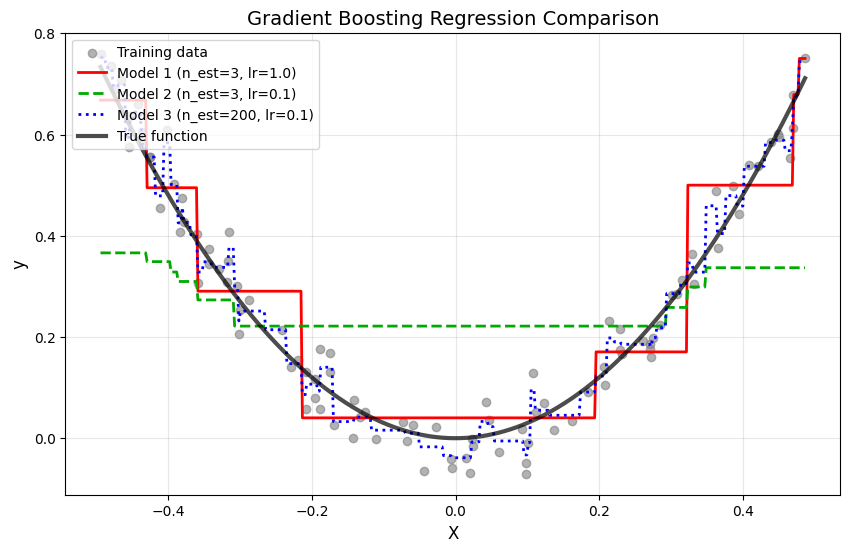

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gbt_comparison(models, model_names, X, y, true_func=None):
    """
    可视化多个梯度提升回归模型的预测曲线
    
    参数：
    models -- 包含多个已训练模型的列表
    model_names -- 对应的模型名称列表
    X -- 原始特征数据
    y -- 原始标签数据
    true_func -- 真实函数（可选）
    """
    plt.figure(figsize=(10, 6))
    
    # 生成测试数据
    X_test = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    
    # 绘制原始数据点
    plt.scatter(X, y, c='gray', alpha=0.6, label='Training data')
    
    # 绘制每个模型的预测曲线
    colors = ['#FF0000', '#00AA00', '#0000FF']
    linestyles = ['-', '--', ':']
    
    for idx, (model, name) in enumerate(zip(models, model_names)):
        y_pred = model.predict(X_test)
        plt.plot(X_test, y_pred, 
                 color=colors[idx],
                 linestyle=linestyles[idx],
                 linewidth=2,
                 label=f'{name} (n_est={model.n_estimators}, lr={model.learning_rate})')
    
    # 绘制真实函数
    if true_func is not None:
        y_true = true_func(X_test)
        plt.plot(X_test, y_true, 'k-', linewidth=3, alpha=0.7, label='True function')
    
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('Gradient Boosting Regression Comparison', fontsize=14)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.3)
    plt.show()

# 使用示例
true_function = lambda x: 3 * x**2  # 定义真实函数

plot_gbt_comparison(
    models=[gbt_reg1, gbt_reg2, gbt_reg3],
    model_names=['Model 1', 'Model 2', 'Model 3'],
    X=X,
    y=y,
    true_func=true_function
)

提前停止策略
